In [1]:
%load_ext autoreloadsea_level_pressure_mbar_mean

In [2]:
%autoreload 2

In [3]:
import pandas as pd
from pathlib import Path
import numpy as np

import src.data.reshape as rs

In [4]:
pd.options.display.max_columns= 50

In [5]:
gsod = pd.read_csv('../data/raw/data_candidate_stations_50km_10yr.csv')

In [6]:
gsod.shape

(1852346, 27)

In [7]:
gsod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852346 entries, 0 to 1852345
Data columns (total 27 columns):
 #   Column            Dtype  
---  ------            -----  
 0   stn               int64  
 1   wban              int64  
 2   year              int64  
 3   mo                int64  
 4   da                int64  
 5   temp              float64
 6   count_temp        int64  
 7   dewp              float64
 8   count_dewp        int64  
 9   slp               float64
 10  count_slp         int64  
 11  stp               float64
 12  count_stp         int64  
 13  visib             float64
 14  count_visib       int64  
 15  wdsp              float64
 16  count_wdsp        int64  
 17  max               float64
 18  flag_max          object 
 19  min               float64
 20  flag_min          object 
 21  prcp              float64
 22  flag_prcp         object 
 23  sndp              float64
 24  rain_drizzle      int64  
 25  snow_ice_pellets  int64  
 26  hail          

In [8]:
gsod.describe()

,stn,wban,year,mo,da,temp,count_temp,dewp,count_dewp,slp,count_slp,stp,count_stp,visib,count_visib,wdsp,count_wdsp,max,min,prcp,sndp,rain_drizzle,snow_ice_pellets,hail
count,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06,1.852346e+06
mean,7.657544e+05,5.596731e+04,1.993033e+03,6.502181e+00,1.572011e+01,5.580638e+01,2.115253e+01,7.938900e+02,1.958347e+01,3.363682e+03,1.544760e+01,4.144599e+03,1.250161e+01,1.611490e+02,1.823835e+01,3.203407e+01,2.054982e+01,7.348084e+01,5.296628e+01,8.034921e+00,9.664310e+02,1.924765e-01,4.754889e-02,2.551359e-03
std,9.962065e+04,3.841529e+04,2.218501e+01,3.454415e+00,8.798170e+00,1.697246e+01,5.557121e+00,2.635599e+03,7.685869e+00,3.947508e+03,1.044634e+01,4.351063e+03,1.113624e+01,3.481627e+02,8.897862e+00,1.582150e+02,6.404311e+00,2.567471e+02,2.637000e+02,2.712208e+01,1.794227e+02,3.942453e-01,2.168805e-01,6.552851e-02
min,6.914840e+05,1.210000e+02,1.931000e+03,1.000000e+00,1.000000e+00,-4.920000e+01,4.000000e+00,-8.450000e+01,0.000000e+00,9.169000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.800000e+01,-5.310000e+01,0.000000e+00,4.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.227880e+05,2.318300e+04,1.978000e+03,3.000000e+00,8.000000e+00,4.640000e+01,2.300000e+01,3.100000e+01,1.600000e+01,1.013000e+03,0.000000e+00,9.347000e+02,0.000000e+00,9.800000e+00,1.400000e+01,4.000000e+00,2.100000e+01,5.590000e+01,3.700000e+01,0.000000e+00,9.999000e+02,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.248800e+05,2.423300e+04,1.998000e+03,7.000000e+00,1.600000e+01,5.750000e+01,2.400000e+01,4.300000e+01,2.400000e+01,1.017900e+03,2.300000e+01,1.011500e+03,1.300000e+01,1.290000e+01,2.400000e+01,5.800000e+00,2.400000e+01,6.800000e+01,4.800000e+01,0.000000e+00,9.999000e+02,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.278550e+05,9.999900e+04,2.012000e+03,1.000000e+01,2.300000e+01,6.610000e+01,2.400000e+01,5.300000e+01,2.400000e+01,9.999900e+03,2.400000e+01,9.999900e+03,2.400000e+01,3.230000e+01,2.400000e+01,8.100000e+00,2.400000e+01,7.880000e+01,5.680000e+01,0.000000e+00,9.999000e+02,0.000000e+00,0.000000e+00,0.000000e+00
max,9.999990e+05,9.999900e+04,2.022000e+03,1.200000e+01,3.100000e+01,1.099000e+02,2.400000e+01,9.999900e+03,2.400000e+01,9.999900e+03,2.400000e+01,9.999900e+03,2.400000e+01,9.999000e+02,2.400000e+01,9.999000e+02,2.400000e+01,9.999900e+03,9.999900e+03,9.999000e+01,9.999000e+02,1.000000e+00,1.000000e+01,1.000000e+01


In [9]:
gsod[['rain_drizzle', 'snow_ice_pellets', 'hail']].value_counts()

rain_drizzle  snow_ice_pellets  hail
0             0                 0       1436083
1             0                 0        324909
0             1                 0         58213
1             1                 0         28739
              0                 1          2161
0             0                 1          1440
1             1                 1           724
0             1                 1            41
              10                10           36
dtype: int64

In [10]:
gsod.isna().sum()

stn                      0
wban                     0
year                     0
mo                       0
da                       0
temp                     0
count_temp               0
dewp                     0
count_dewp               0
slp                      0
count_slp                0
stp                      0
count_stp                0
visib                    0
count_visib              0
wdsp                     0
count_wdsp               0
max                      0
flag_max            717620
min                      0
flag_min            793158
prcp                     0
flag_prcp           148243
sndp                     0
rain_drizzle             0
snow_ice_pellets         0
hail                     0
dtype: int64

In [11]:
gsod.head()

,stn,wban,year,mo,da,temp,count_temp,dewp,count_dewp,slp,count_slp,stp,count_stp,visib,count_visib,wdsp,count_wdsp,max,flag_max,min,flag_min,prcp,flag_prcp,sndp,rain_drizzle,snow_ice_pellets,hail
0,691484,99999,1985,1,26,38.1,5,37.4,5,9999.9,0,9999.9,0,4.8,5,5.2,5,39.2,*,37.4,*,99.99,NaN,0.8,1,0,0
1,691484,99999,1985,1,27,34.5,5,30.6,5,9999.9,0,9999.9,0,4.9,5,3.8,5,39.2,*,30.2,*,99.99,NaN,999.9,1,1,0
2,691484,99999,1985,1,28,26.9,17,20.1,17,9999.9,0,9999.9,0,5.9,17,2.5,17,33.8,*,19.4,*,0.00,I,999.9,0,0,0
3,691484,99999,1985,1,29,32.6,14,29.0,14,9999.9,0,9999.9,0,3.9,14,0.8,14,35.6,*,28.4,*,0.00,I,999.9,0,0,0
4,691484,99999,1985,1,30,39.6,9,36.8,9,9999.9,0,9999.9,0,4.5,9,3.2,9,44.6,*,37.4,*,99.99,NaN,999.9,1,0,0


In [12]:
# rename and set dtypes -- only transform is parsing dates
gsod = rs._load_gsod('../data/raw/data_candidate_stations_50km_10yr.csv')

In [13]:
gsod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852346 entries, 0 to 1852345
Data columns (total 25 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   timestamp                       datetime64[ns]
 1   usaf                            object        
 2   wban                            object        
 3   temp_f_mean                     float32       
 4   temp_count                      uint8         
 5   dew_point_f_mean                float32       
 6   dew_point_count                 uint8         
 7   sea_level_pressure_mbar_mean    float32       
 8   sea_level_pressure_count        uint8         
 9   pressure_mbar_mean              float32       
 10  pressure_count                  uint8         
 11  visbility_miles_mean            float32       
 12  visbility_count                 uint8         
 13  wind_speed_knots_mean           float32       
 14  wind_speed_count                uint8         
 15

# QA
## Accuracy
Defer. The best source of comparison data are other nearby stations. Will use a "majority vote" kind of strategy to assess this later.
## Consistency
The scope here is consistency *between* datasets, not over time (though that is critical and will be assessed later). The only other dataset is the station list.
- [x] begin/end dates
**Conclusion:** 30% of date ranges from the station list were off by at least a week, 20% by at least a year, and 10% by at least 5 years! This suggests that my initial station filtering (which assumed reliable duration info) may contain significant errors on up to 20% of stations. I may want to revisit the filtering criteria based on empirical duration info.

In [14]:
stations = pd.read_csv('../data/interim/candidate_stations_50km_10yr.csv', dtype={'usaf': str, 'wban': str}, parse_dates=['begin', 'end'])

In [15]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   usaf            235 non-null    object        
 1   wban            235 non-null    object        
 2   name            235 non-null    object        
 3   country         235 non-null    object        
 4   state           198 non-null    object        
 5   call            181 non-null    object        
 6   lat             235 non-null    float64       
 7   lon             235 non-null    float64       
 8   elev            235 non-null    float64       
 9   begin           235 non-null    datetime64[ns]
 10  end             235 non-null    datetime64[ns]
 11  duration_years  235 non-null    float64       
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 22.2+ KB


In [16]:
data_periods = gsod.groupby(['usaf', 'wban'])['timestamp'].agg(['min', 'max', 'count'])

In [17]:
data_periods.head()

,,min,max,count
usaf,wban,,,
691484,99999,1985-01-26,2012-06-18,182
710370,99999,2003-06-17,2022-04-16,6794
710420,99999,2001-09-16,2022-04-16,5001
710670,99999,2008-04-02,2022-04-16,4882
711120,99999,1980-10-01,2013-10-28,5667


In [18]:
data_periods = data_periods.join(stations.set_index(['wban', 'usaf'])[['begin', 'end']])

In [19]:
seconds_per_day = 60 * 60 * 24

In [20]:
data_periods['expected_duration_days'] = data_periods['end'].sub(data_periods['begin']).dt.total_seconds() / seconds_per_day
data_periods['actual_duration_days'] = data_periods['max'].sub(data_periods['min']).dt.total_seconds() / seconds_per_day

In [21]:
data_periods['diff_duration_days'] = data_periods['expected_duration_days'] - data_periods['actual_duration_days']

<AxesSubplot:>

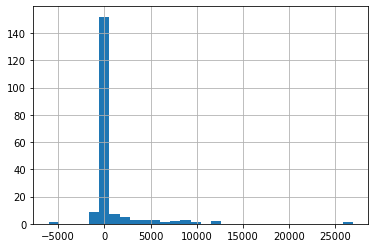

In [22]:
data_periods['diff_duration_days'].hist(bins=30)

<AxesSubplot:>

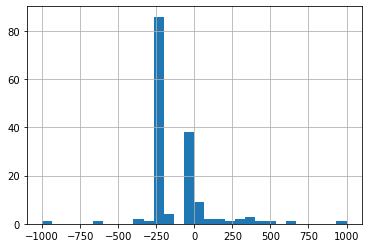

In [23]:
# zoom in
# weird double peak -- maybe because station list end dates are out of date?
data_periods['diff_duration_days'].hist(bins=30, range=(-1000, 1000))

In [24]:
# yep, out of date
stations['end'].nlargest(5)

195   2021-09-22
196   2021-09-22
197   2021-09-22
113   2021-09-21
114   2021-09-21
Name: end, dtype: datetime64[ns]

max
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: diff_duration_days, dtype: object

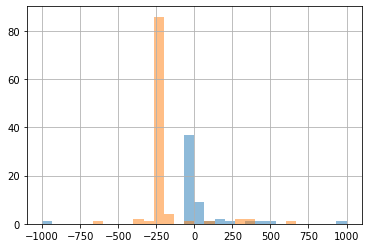

In [25]:
# plot histogram faceted on currently operating stations
# confirms the station list out-of-date end-date hypothesis
data_periods.groupby(data_periods['max'].dt.year == 2022)['diff_duration_days'].hist(bins=30, range=(-1000, 1000), alpha=0.5)

In [26]:
data_periods['is_currently_operating'] = data_periods['max'].dt.year == 2022

In [27]:
data_periods['begin_diff_days'] = data_periods['begin'].sub(data_periods['min']).dt.total_seconds() / seconds_per_day
data_periods['end_diff_days'] = data_periods['end'].sub(data_periods['max']).dt.total_seconds() / seconds_per_day

is_currently_operating
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: begin_diff_days, dtype: object

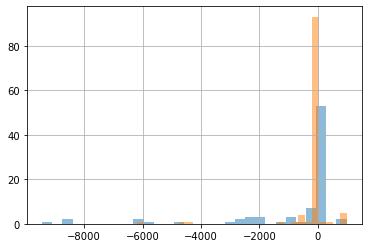

In [28]:
# current operation shouldn't effect start date
data_periods.groupby('is_currently_operating')['begin_diff_days'].hist(bins=30, alpha=0.5)

In [29]:
# fraction with difference > 1 week
data_periods['begin_diff_days'].abs().gt(7).mean()

0.242152466367713

is_currently_operating
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: begin_diff_days, dtype: object

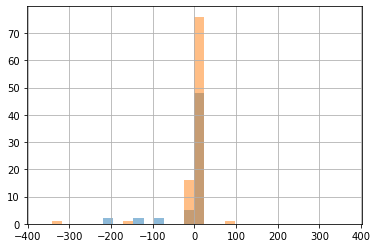

In [30]:
# zoom in on +- 1 year
data_periods.groupby('is_currently_operating')['begin_diff_days'].hist(bins=30, range=(-365, 365), alpha=0.5)

<AxesSubplot:>

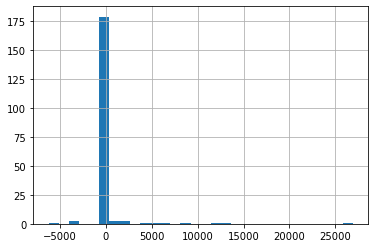

In [31]:
data_periods['end_diff_days'].hist(bins=30)

In [32]:
# fraction with difference > 1 week
# retired stations
data_periods.loc[~data_periods['is_currently_operating'], 'end_diff_days'].abs().gt(7).mean()

0.25287356321839083

In [33]:
# current stations
median_diff = data_periods.loc[data_periods['is_currently_operating'], 'end_diff_days'].median()
median_diff, data_periods.loc[data_periods['is_currently_operating'], 'end_diff_days'].sub(median_diff).abs().gt(7).mean()

(-208.0, 0.022058823529411766)

is_currently_operating
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: end_diff_days, dtype: object

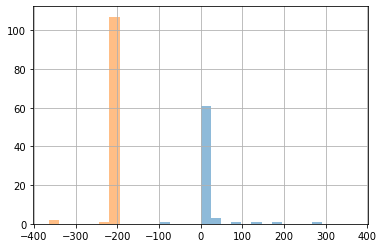

In [34]:
data_periods.groupby('is_currently_operating')['end_diff_days'].hist(bins=30, range=(-365, 365), alpha=0.5)

In [35]:
# replace September 2021 end dates with data download date
data_periods['modified_end'] = data_periods['end'].where(data_periods['end'].lt('2021-09-01'), data_periods['max'].max())

In [36]:
data_periods['modified_expected_duration_days'] = data_periods['modified_end'].sub(data_periods['begin']).dt.total_seconds() / seconds_per_day

In [37]:
data_periods['modified_diff_duration_days'] = data_periods['modified_expected_duration_days'] - data_periods['actual_duration_days']

<AxesSubplot:>

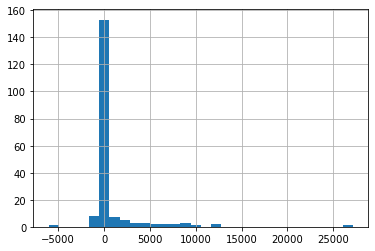

In [38]:
data_periods['modified_diff_duration_days'].hist(bins=30)

<AxesSubplot:>

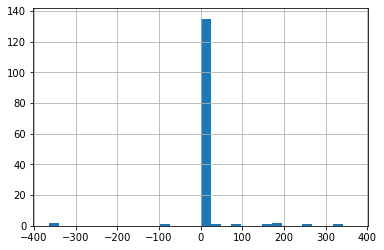

In [39]:
# zoom in +- 1 year
data_periods['modified_diff_duration_days'].hist(bins=30, range=(-365, 365))

<AxesSubplot:>

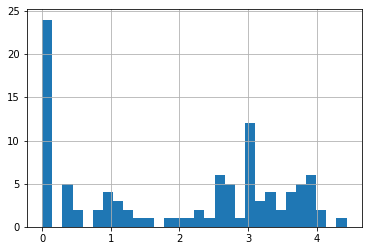

In [40]:
# distribution of non-zero diffs
data_periods['modified_diff_duration_days'].abs().replace(0, np.nan).transform(np.log10).hist(bins=30)

In [41]:
# fraction with durations off by more than 1 week
data_periods['modified_diff_duration_days'].abs().gt(7).mean()

0.30493273542600896

In [42]:
# fraction with durations off by more than 1 year
data_periods['modified_diff_duration_days'].abs().gt(365).mean()

0.21524663677130046

In [43]:
# fraction with durations off by more than 5 years
data_periods['modified_diff_duration_days'].abs().gt(365*5).mean()

0.10762331838565023

## Uniformity
- [x] NULL values
- [ ] units
- [ ] 
### Null Representation
Documentation states that different float columns have different null representation - mostly 9999.9, some 999.9, and a few 99.99. I'll first verify that claim and then convert it to np.NaN

In [44]:
nominal_nan = {
    'temp_f_mean': 9999.9,
    'temp_f_max': 9999.9,
    'temp_f_min': 9999.9,
    'dew_point_f_mean': 9999.9,
    'sea_level_pressure_mbar_mean': 9999.9,
    'pressure_mbar_mean': 9999.9,
    'visbility_miles_mean': 999.9,
    'wind_speed_knots_mean': 999.9,
    'snow_depth_inches': 999.9,
    # note: see precipitation_measurement_type column for NaN semantics. Sometimes it means 0, sometimes missing.
    'precipitation_total_inches': 99.99
}

In [45]:
# suspicious that there are zero missing temp_f_mean values
gsod[nominal_nan.keys()].max()

temp_f_mean                      109.900002
temp_f_max                      9999.900391
temp_f_min                      9999.900391
dew_point_f_mean                9999.900391
sea_level_pressure_mbar_mean    9999.900391
pressure_mbar_mean              9999.900391
visbility_miles_mean             999.900024
wind_speed_knots_mean            999.900024
snow_depth_inches                999.900024
precipitation_total_inches        99.989998
dtype: float32

In [46]:
for col, sentinel in nominal_nan.items():
    is_nan = np.isclose(gsod.loc[:, col], sentinel, rtol=1e-5)
    gsod.loc[is_nan, col] = np.nan

In [47]:
# check next highest values in case multiple sentinel values were used
# Looks good!
gsod[nominal_nan.keys()].max()

temp_f_mean                      109.900002
temp_f_max                       122.900002
temp_f_min                       105.800003
dew_point_f_mean                  77.199997
sea_level_pressure_mbar_mean    1078.199951
pressure_mbar_mean              1042.500000
visbility_miles_mean              99.400002
wind_speed_knots_mean             73.300003
snow_depth_inches                102.400002
precipitation_total_inches        12.130000
dtype: float32

In [48]:
gsod[nominal_nan.keys()].isna().mean()

temp_f_mean                     0.000000
temp_f_max                      0.000665
temp_f_min                      0.000700
dew_point_f_mean                0.075752
sea_level_pressure_mbar_mean    0.261359
pressure_mbar_mean              0.355444
visbility_miles_mean            0.146820
wind_speed_knots_mean           0.026015
snow_depth_inches               0.966373
precipitation_total_inches      0.080030
dtype: float64

### Units
Defer. Max values above look good and thus bound unit problems. But detecting too-large units (centigrade, bar, feet) which produce too-narrow distributions of values requires looking at distributions by station, which is too much effort for this first pass.

## Completeness
- [x] date density
- [x] nulls

**Conclusion:** After filtering for days with at least 20/24 samples, only 45% of stations have at least 80% of their nominal data period available. This may be an inappropriate filter for the handful of stations with non-hourly sample periods, but about 200 of the 223 stations (90%) are likely hourly.
### Missing Dates
What fraction of timestamps are present between the first and last entry for each station?

In [49]:
data_periods['expected_days'] = data_periods['max'].sub(data_periods['min']).dt.total_seconds() / seconds_per_day

In [50]:
data_periods['count_diff_days'] = data_periods['expected_days'].sub(data_periods['count'])

In [51]:
data_periods['frac_diff_days'] = data_periods['count'].div(data_periods['expected_days'])

<AxesSubplot:>

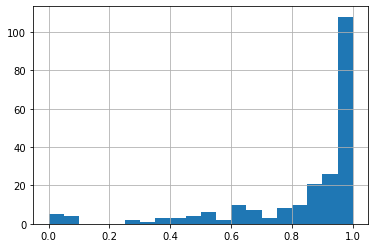

In [52]:
data_periods['frac_diff_days'].replace(np.inf, 0).hist(bins=20)

In [53]:
# fraction of stations with at least 90% data coverage
data_periods['frac_diff_days'].ge(0.9).mean()

0.6053811659192825

In [54]:
# fraction of stations with at least 80% data coverage
data_periods['frac_diff_days'].ge(0.8).mean()

0.7443946188340808

### Null Values
Two parts: one is literal nulls, the second is values based on insufficient counts. This has to be evaluated station-by-station and also over time.

In [55]:
resolution = gsod.groupby(['usaf', 'wban'])['temp_count'].describe()
resolution.head()

,,count,mean,std,min,25%,50%,75%,max
usaf,wban,,,,,,,,
691484,99999,182.0,18.659341,6.948460,4.0,12.0,23.0,24.0,24.0
710370,99999,6794.0,21.391080,5.801819,4.0,24.0,24.0,24.0,24.0
710420,99999,5001.0,15.399120,9.331145,4.0,4.0,22.0,24.0,24.0
710670,99999,4882.0,5.892052,1.961947,4.0,4.0,4.0,8.0,8.0
711120,99999,5667.0,7.189342,1.135059,4.0,7.0,8.0,8.0,9.0


In [56]:
# almost all hourly
resolution['max'].value_counts()

24.0    192
16.0      5
5.0       4
8.0       3
21.0      3
19.0      3
6.0       3
9.0       2
14.0      2
18.0      1
4.0       1
7.0       1
15.0      1
17.0      1
22.0      1
Name: max, dtype: int64

In [57]:
# almost all hourly
resolution['75%'].value_counts()

24.0    176
15.0     11
8.0       7
16.0      7
4.0       7
14.0      3
7.0       2
5.0       2
23.0      2
17.0      1
21.0      1
12.0      1
6.0       1
13.0      1
18.0      1
Name: 75%, dtype: int64

In [58]:
# looks like there is a lower bound at 4
resolution['min'].value_counts()

4.0     157
6.0      25
5.0      18
7.0      12
8.0       9
12.0      1
10.0      1
Name: min, dtype: int64

In [59]:
gsod['filtered_temp'] = gsod['temp_f_mean'].where(gsod['temp_count'] >= 20, np.nan)

In [60]:
coverage = gsod.groupby(['usaf', 'wban'])['filtered_temp'].count()
coverage.head()

usaf    wban 
691484  99999     114
710370  99999    5687
710420  99999    2631
710670  99999       0
711120  99999       0
Name: filtered_temp, dtype: int64

In [61]:
data_periods = pd.concat([data_periods, coverage], axis=1, copy=False)

In [62]:
data_periods['frac_filtered_count'] = data_periods['filtered_temp'].div(data_periods['expected_days'])

<AxesSubplot:>

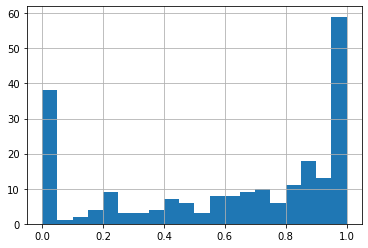

In [63]:
data_periods['frac_filtered_count'].replace(np.inf, 0).hist(bins=20)

In [64]:
# fraction of stations with at least 90% data coverage
data_periods['frac_filtered_count'].ge(0.9).mean()

0.32286995515695066

In [65]:
# fraction of stations with at least 80% data coverage
data_periods['frac_filtered_count'].ge(0.8).mean()

0.452914798206278

In [66]:
data_periods.shape

(223, 19)

## Validity
### Range
- [x] temperatures
- [x] precipitation
- [x] counts

array([[<AxesSubplot:title={'center':'temp_f_mean'}>,
        <AxesSubplot:title={'center':'temp_f_min'}>],
       [<AxesSubplot:title={'center':'temp_f_max'}>, <AxesSubplot:>]],
      dtype=object)

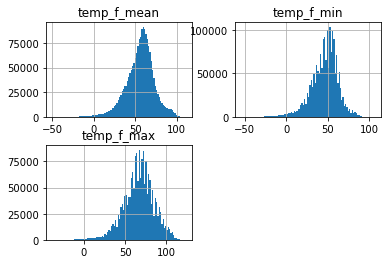

In [67]:
# no outliers, all plausible
gsod[['temp_f_mean', 'temp_f_min', 'temp_f_max']].hist(bins=100)

<AxesSubplot:>

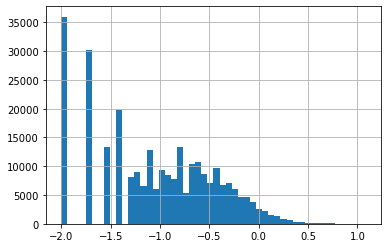

In [68]:
# no outliers, all plausible
gsod['precipitation_total_inches'].replace(0, np.nan).transform(np.log10).hist(bins=50)

In [69]:
count_cols = [col for col in gsod.columns if col.endswith('_count')]
count_cols

['temp_count',
 'dew_point_count',
 'sea_level_pressure_count',
 'pressure_count',
 'visbility_count',
 'wind_speed_count']

array([[<AxesSubplot:title={'center':'temp_count'}>,
        <AxesSubplot:title={'center':'dew_point_count'}>],
       [<AxesSubplot:title={'center':'sea_level_pressure_count'}>,
        <AxesSubplot:title={'center':'pressure_count'}>],
       [<AxesSubplot:title={'center':'visbility_count'}>,
        <AxesSubplot:title={'center':'wind_speed_count'}>]], dtype=object)

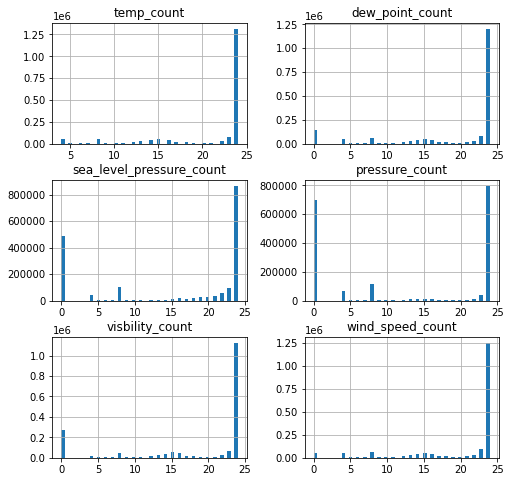

In [70]:
# no outliers, all plausible
# note presence of secondary peaks at 4 and 8 counts (6 hr and 3 hr measurement periods)
gsod[count_cols].hist(bins=50, figsize=(8,8))

### Uniqueness
- [x] check primary key
- [x] do I want a surrogate station id? \[no, I won't bother. It only saves one net column\]

In [71]:
# no duplicates!
key = ['usaf', 'wban', 'timestamp']
gsod.duplicated(subset=key).sum()

0

### Set Membership
- [x] measurement types

Binary indicators for snow and hail have parsing errors in a few values. Will set those to null.

In [72]:
# looks good
gsod['temp_max_measurement_type'].value_counts(dropna=False)

*      1134726
NaN     717620
Name: temp_max_measurement_type, dtype: int64

In [73]:
# looks good
gsod['temp_min_measurement_type'].value_counts(dropna=False)

*      1059188
NaN     793158
Name: temp_min_measurement_type, dtype: int64

In [74]:
# looks good
gsod['precipitation_measurement_type'].value_counts(dropna=False)

I      709877
G      707796
NaN    148243
D      136023
B       50026
H       35297
C       33166
A       31917
E           1
Name: precipitation_measurement_type, dtype: int64

In [75]:
# "10" is a parsing error.
# The original data is encoded as a 5 character string "01234"
# with each position corresponding to a particular weather category ('rain', 'fog', etc)
# Don't know what "10" is - it could be an off-by-one error. I'll set them to Null.
gsod['had_hail'].value_counts(dropna=False)

0     1847944
1        4366
10         36
Name: had_hail, dtype: int64

In [76]:
gsod['had_rain'].value_counts(dropna=False)

0    1495813
1     356533
Name: had_rain, dtype: int64

In [77]:
# parsing error
gsod['had_snow_ice'].value_counts(dropna=False)

0     1764593
1       87717
10         36
Name: had_snow_ice, dtype: int64

### Type
- [x] last 3 columns should be booleans. Why aren't they?

Because of the parsing errors above.

### Cross-Field
- [x] min < mean < max
- [x] dew point < temp
- [x] precip >=0 when rain | snow/ice indicators and vice versa
- [x] sea level pressure > station pressure

Temperatures and dew points look good here.

Precipitation measurements don't match indicators very well. First, when indicators show precipitation, measured precip is NaN 35% of the time (vs only 0.17% NaN when indicators are `False`). Second, 8% of `False` indicator values have measureable precip, and 26% of not-null `True` indicators show 0 measured precip.

Pressures also have some inconsistencies. Some are outright erroneous (bad values or maybe different units). Some stations have a tight relationshp between SLP and station Pressure while others are fuzzy. There are many rows where SLP < station pressure, which shouldn't be the case unless the station is below sea level (none are). Because pressure isn't one of the main variables we will be working with, I'll ignore this for now.

#### Min/Mean/Max Temperature order

In [78]:
# should be false
min_gt_mean = gsod['temp_f_min'].gt(gsod['temp_f_mean'])
min_gt_mean.any()

False

In [79]:
# should be false
mean_gt_max = gsod['temp_f_mean'].gt(gsod['temp_f_max'])
mean_gt_max.any()

False

#### Dew Point vs Mean Temp

In [80]:
# should be false
gsod['temp_f_mean'].lt(gsod['dew_point_f_mean']).any()

False

#### Precipitation Indicators vs Measurements

In [81]:
had_precip = gsod[['had_snow_ice', 'had_rain', 'had_hail']].any(axis=1).rename('had_precip')

In [82]:
gsod.groupby(had_precip)['precipitation_total_inches'].describe()

,count,mean,std,min,25%,50%,75%,max
had_precip,,,,,,,,
False,1433553.0,0.015958,0.123999,0.0,0.0,0.00,0.00,7.87
True,270550.0,0.139564,0.298785,0.0,0.0,0.02,0.16,12.13


had_precip
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: precipitation_total_inches, dtype: object

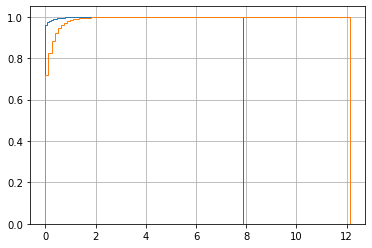

In [83]:
# eCDFs of measured precipitation grouped by presence of precipitation indicator
gsod['precipitation_total_inches'].groupby(had_precip).hist(bins=100, density=True, cumulative=True, histtype='step',)

had_precip
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: precipitation_total_inches, dtype: object

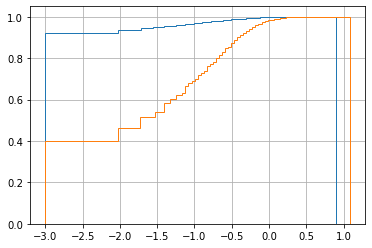

In [84]:
gsod['precipitation_total_inches'].replace(0, 1e-3).transform(np.log10).groupby(had_precip).hist(bins=100, density=True, cumulative=True, histtype='step',)

In [85]:
gsod['precipitation_total_inches'].eq(0).groupby(had_precip).mean()

had_precip
False    0.918602
True     0.260799
Name: precipitation_total_inches, dtype: float64

In [86]:
gsod['precipitation_total_inches'].eq(0).groupby(had_precip).value_counts(dropna=False)

had_precip  precipitation_total_inches
False       True                          1319188
            False                          116895
True        False                          307702
            True                           108561
Name: precipitation_total_inches, dtype: int64

In [87]:
gsod['precipitation_total_inches'].isna().groupby(had_precip).mean()

had_precip
False    0.001762
True     0.350050
Name: precipitation_total_inches, dtype: float64

#### Sea Level vs Station Pressures

In [88]:
# should be False
gsod['sea_level_pressure_mbar_mean'].lt(gsod['pressure_mbar_mean']).any()

True

<AxesSubplot:xlabel='pressure_mbar_mean', ylabel='sea_level_pressure_mbar_mean'>

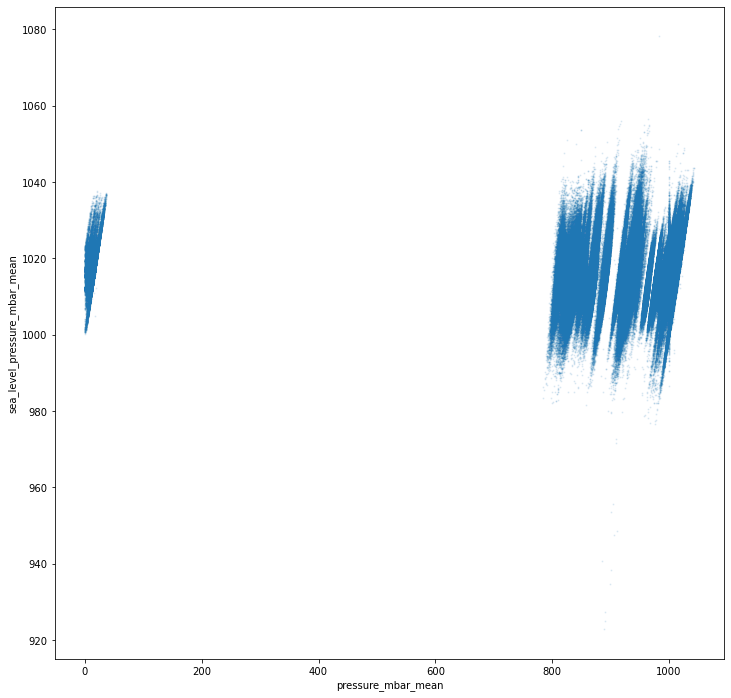

In [89]:
# clearly erroneous pressures near 0 break the above test
gsod.plot.scatter(x='pressure_mbar_mean', y='sea_level_pressure_mbar_mean', s=1, alpha=0.1, figsize=(12,12))

In [90]:
pressure_is_weird = gsod['pressure_mbar_mean'].lt(200).rename('weird_pressure')

In [91]:
# should be False
gsod.loc[~pressure_is_weird, 'sea_level_pressure_mbar_mean'].lt(gsod.loc[~pressure_is_weird, 'pressure_mbar_mean']).any()

True

In [92]:
# should be False
gsod['sea_level_pressure_mbar_mean'].lt(gsod['pressure_mbar_mean']).groupby(pressure_is_weird).value_counts(dropna=False)

weird_pressure       
False           False    1801169
                True        1685
True            False      49492
dtype: int64

<AxesSubplot:xlabel='pressure_mbar_mean', ylabel='sea_level_pressure_mbar_mean'>

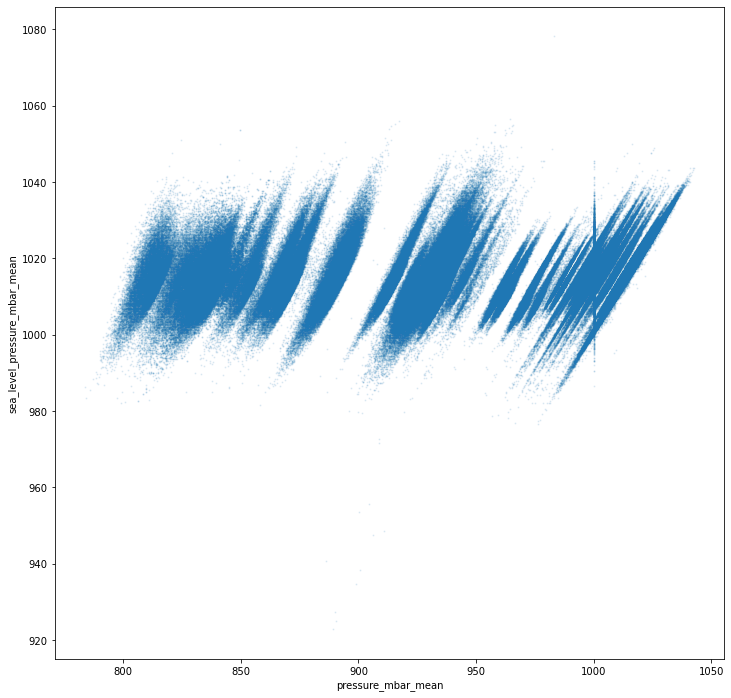

In [93]:
# clearly erroneous pressures at one station: constant 1000 mbar
# Also, some stations have very tight distribution while others are very broad. Don't know what that means.
gsod.loc[~pressure_is_weird,:].plot.scatter(x='pressure_mbar_mean', y='sea_level_pressure_mbar_mean', s=1, alpha=0.1, figsize=(12,12))